# Random Forest

In [11]:
import pandas as pd
import random as rd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import matplotlib.pyplot as plt

import utils

## Base Line

In [12]:
# Load data
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
X_train, X_test, y_train, y_test = utils.splitTrain(train_input, train_output)

# Create model
knn_model = RandomForestClassifier()
knn_model.fit(X_train, y_train["result"])

# Prediction
y_pred = knn_model.predict(X_test)
# print(knn_model.predict_proba(X_test))

# Evaluation
metrics.accuracy_score(y_test, y_pred)

0.9911154031868662

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


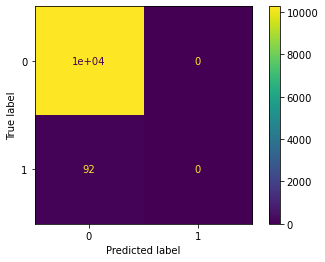

In [13]:
plot_confusion_matrix(knn_model, X_test, y_test)
plt.show()

# Balanced Classes

## Remove Individuals

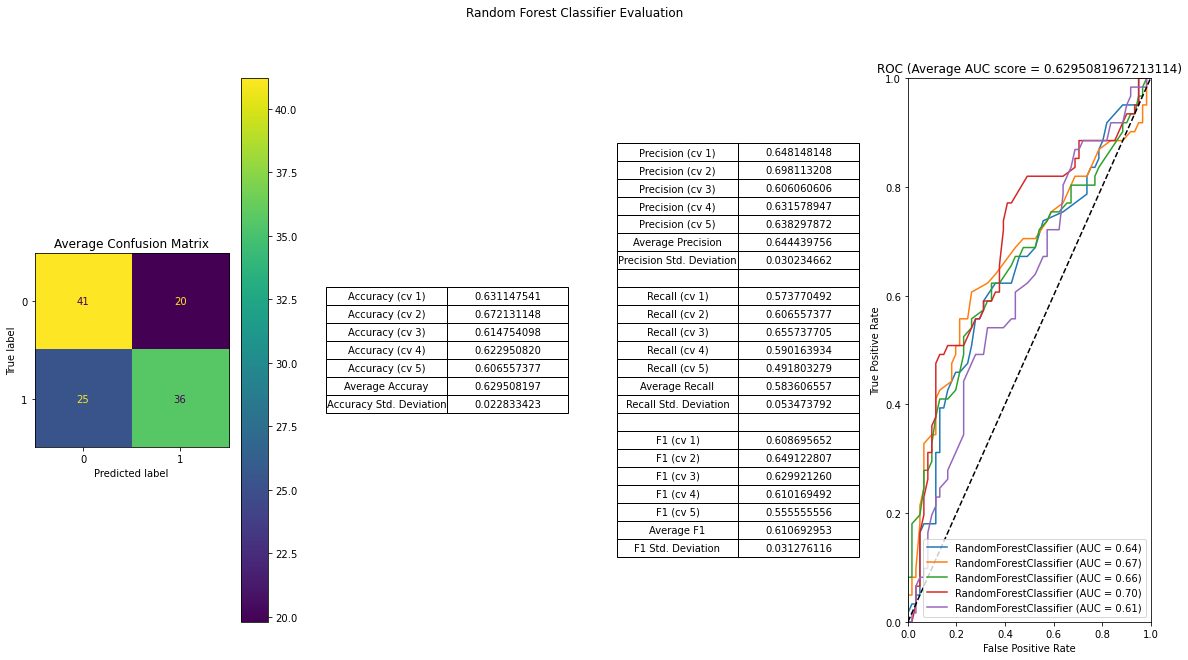

In [14]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
train_input, train_output = utils.balanceClassesByRemoving(train_input, train_output)

# Create model
clf = RandomForestClassifier()

# Evaluation
utils.modelEvaluation(clf, train_input, train_output, model_name="Random Forest Classifier", fig_name="rfc_r")

## Duplicate Individuals

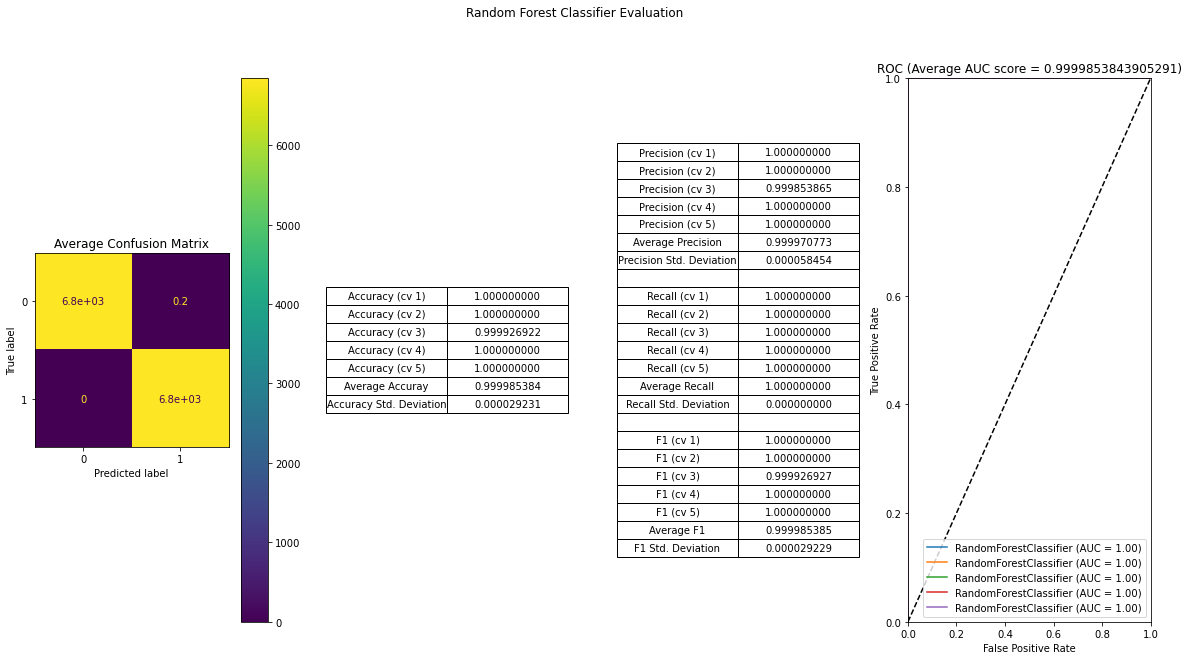

In [15]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData("data/train_inputs_balanced.csv", "data/train_output_balanced.csv", True, True)
# train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)
# train_input, train_output = utils.balanceClassesByDuplicating(train_input, train_output, modify=False)

# Create model
clf = RandomForestClassifier()

# Evaluation
utils.modelEvaluation(clf, train_input, train_output, model_name="Random Forest Classifier", fig_name="rfc_d")

## Weight

/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/fabien/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: Un

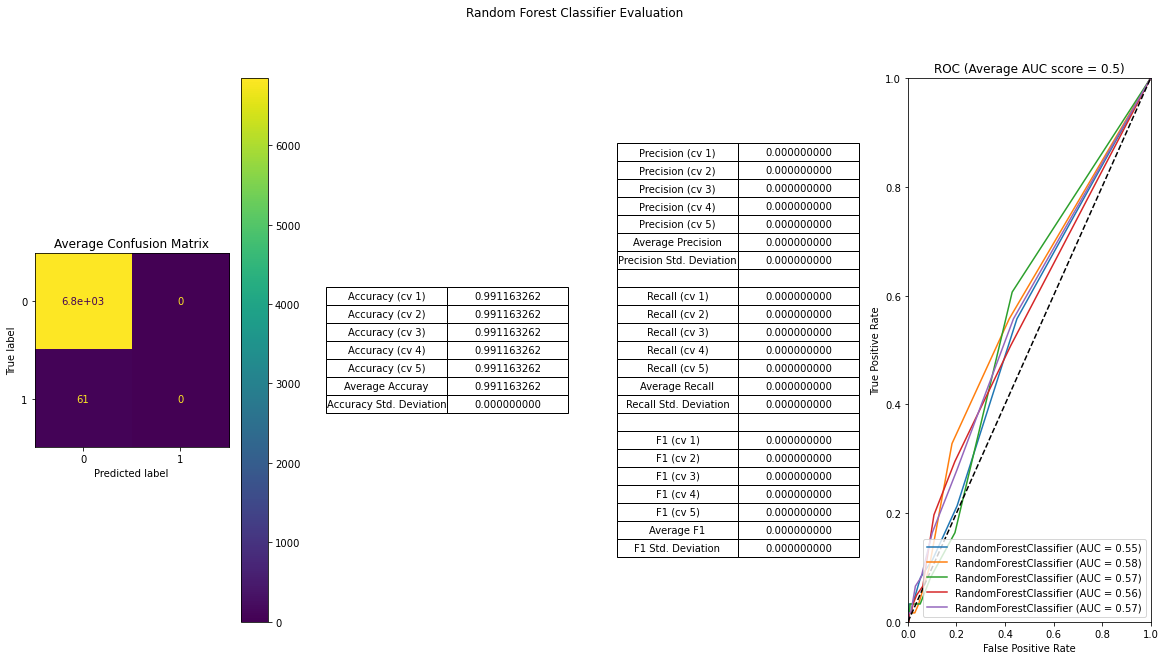

In [17]:
# Load date and balance classes
train_input, train_output = utils.loadTrainingData(remove_id=True, remove_capuchon_insertion=True)

# Create model
clf = RandomForestClassifier(class_weight="balanced") # balanced_subsample

# Evaluation
utils.modelEvaluation(clf, train_input, train_output, model_name="Random Forest Classifier", fig_name="rfc_w")